# TASK 3 - Optimization

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt 
import seaborn as sns

### Implementing the functions

#### Gradient descent with momentum

In [2]:
#implementing the gradient descent with momentum function
def mom_gradient_descent(func, x_prev, learning_rate=0.0001, beta=0.8): #i've tested the different parameters, those work best
    eps = 0.0001
    _iter = 1
    seq_x = []
    seq_y =  []

    x_next = x_prev
    vt = np.zeros_like(x_prev)  # innitial velocity is 0

    while np.linalg.norm(learning_rate * func(x_next[0], x_next[1])) > eps:
        gradient = func(x_next[0], x_next[1])  #the gradient
        vt = beta * vt + learning_rate * gradient  # updating velocity
        x_next = x_next - vt  # updating position
        _iter += 1

        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])

    return x_next, _iter, seq_x, seq_y

#### ADAM

In [3]:
#implementing the ADAM optimization function
def adam(func,x_prev,learning_rate=0.2,betta_1=0.8, betta_2=0.95, e=1e-7): #i've tested the different parameters, those work best
    eps = 0.0001
    _iter = 1
    seq_x = []
    seq_y = []

    vt = (1-betta_1)*func(x_prev[0],x_prev[1])
    st = (1-betta_2)*func(x_prev[0],x_prev[1])**2

    x_next = x_prev - learning_rate*(vt/(1 - betta_1**_iter))/(sqrt(st/(1 - betta_2**_iter)) + e)
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(x_next-x_prev) > eps:
        
        x_prev = x_next
        vt = betta_1*vt + (1-betta_1)*func(x_prev[0],x_prev[1])
        st = betta_2*st + (1-betta_2)*func(x_prev[0],x_prev[1])**2
        _iter += 1
        x_next = x_prev - learning_rate*(vt/(1 - betta_1**_iter))/(sqrt(st/(1 - betta_2**_iter)) + e)
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])

    return (x_next, _iter, seq_x, seq_y)

#### Defining the result plotting function

In [4]:
def min_plot (x_seq,y_seq,a): #a function that creates a conture plot for the methods
    plt.figure(1)
    plt.figure(figsize=(6,4))
    mp=plt.contour(X,Y,Z,cmap='plasma')
    plt.clabel(mp,inline=1,fontsize=8)
    plt.plot(a[0],a[1],':')
    
    plt.plot(x_seq,y_seq, ':')
    plt.show()

### Defining the objective function

In [5]:
def f(x,y): #original function
    return 100*x**2-3000*y**2-y

def dfdx(x,y): #partial derivative of f by x
    return 200*x

def dfdy(x,y): #partial derivative of f  by y
    return 6000*y-1

def grad_vector(x,y): #gradient of function f
    return np.array([dfdx(x,y),dfdy(x,y)])

#### Plotting the objective function

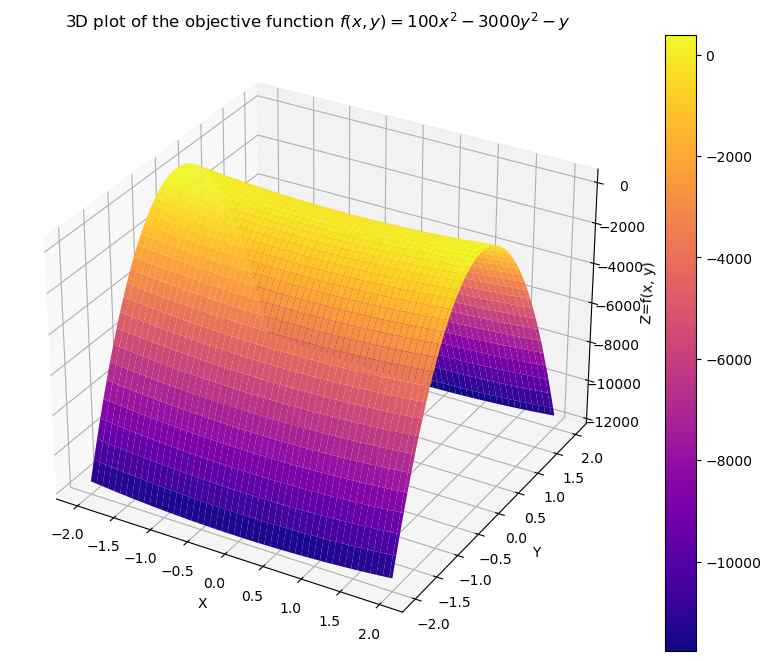

In [6]:
#if you rerun this cell the style of the plot changes
 #a grid of values of x and y to plot the function
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='plasma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z=f(x, y)')
plt.title('3D plot of the objective function $f(x, y) = 100x^2 - 3000y^2 -y$')

fig.colorbar(surf)
plt.show()

### Illustraiting the process of finding extremum

#### Gradient descent with momentum

<Figure size 640x480 with 0 Axes>

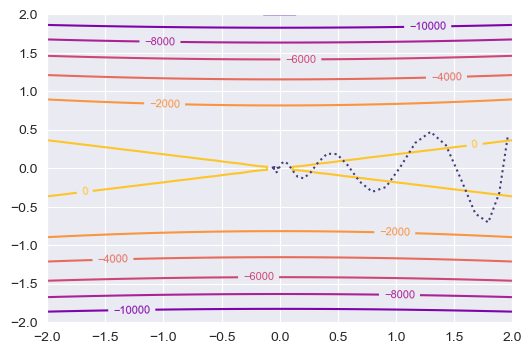

Reached minimum by gradient descent with momentum: -0.00031872347987533573
Number of itterations: 59


In [7]:
sns.set_style('darkgrid') #setting the vizualization style
sns.set_palette('mako')
mom_grad_result=mom_gradient_descent(grad_vector,np.array([2,1])) #calling the gradient descent function, starting point (2,1)
min_plot(mom_grad_result[2],mom_grad_result[3], np.array([2,1])) #vizualizing the process
print ('Reached minimum by gradient descent with momentum:', f(mom_grad_result[0][0],mom_grad_result[0][1]))
print('Number of itterations:',mom_grad_result[1]) 

#### ADAM

<Figure size 640x480 with 0 Axes>

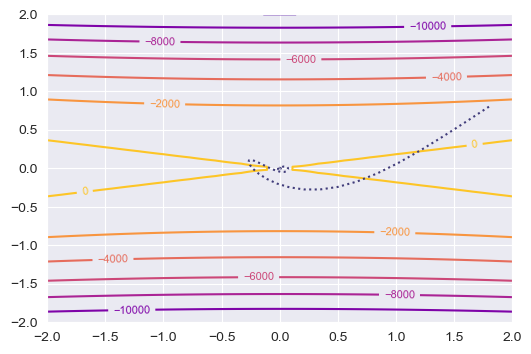

Reached minimum by Adam: -5.328073456443175e-05
Number of itterations: 83


In [8]:
adam_result=adam(grad_vector,np.array([2,1])) #calling the adam functions
min_plot(adam_result[2],adam_result[3], np.array([2,1]))
print ('Reached minimum by Adam:', f(adam_result[0][0],adam_result[0][1]))
print('Number of itterations:',adam_result[1])

#### The dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the number of iterations

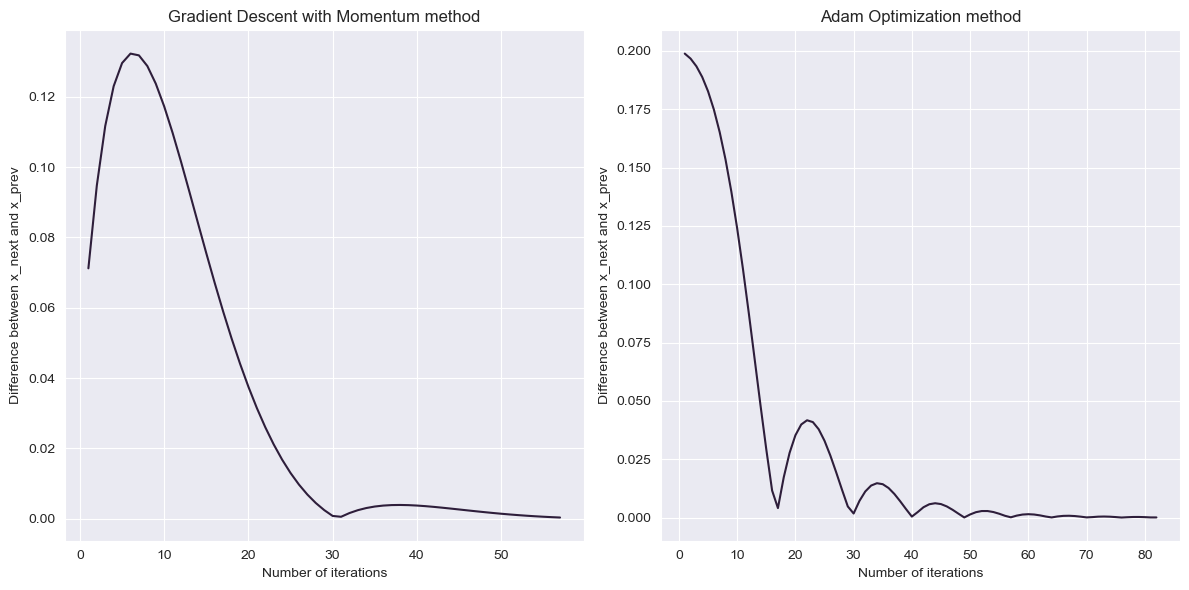

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# the differences between x_next-x_prev
mom_diff = [np.linalg.norm(np.array(mom_grad_result[2])[i] - np.array(mom_grad_result[2])[i-1]) for i in range(1, len(mom_grad_result[2]))]
iterations = list(range(1, len(mom_grad_result[2]))) #for gd with momentum

#for adam
adam_diff = [np.linalg.norm(np.array(adam_result[2])[i] - np.array(adam_result[2])[i-1]) for i in range(1, len(adam_result[2]))]

 #Gradient Descent with Momentum final plot
ax1.plot(iterations, mom_diff)
ax1.set_title("Gradient Descent with Momentum method")
ax1.set_xlabel("Number of iterations")
ax1.set_ylabel("Difference between x_next and x_prev")

# Adam optimization plot
ax2.plot(range(1, adam_result[1]), adam_diff)
ax2.set_title("Adam Optimization method")
ax2.set_xlabel("Number of iterations")
ax2.set_ylabel("Difference between x_next and x_prev")

plt.tight_layout()
plt.show()

### Conclusion

Adam optimization method often outperforms Gradient Descent with momentum when applied to the practical tasks in terms of accuracy. Which is also the case for the objective function and parameters that i've chosen. Gradient descent reached the value of **-0.00031872347987533573**. The Adam reached the value of **-0.00005328073456443175**. 

It's important to note that gradient descent reached the result smoother and with less itterations - **59**, while it took adam method **83**. The performance of the methods is also heavily relies on the parameters chosen. The case might be that the ones I picked are stoppint the methods from performing the best possible way.
